In [3]:
!pip install torch torchvision facenet-pytorch mtcnn opencv-python numpy matplotlib scikit-learn seaborn

  Using cached torch-2.6.0-cp39-cp39-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.21.0-cp39-cp39-win_amd64.whl.metadata (6.3 kB)
  Using cached facenet_pytorch-2.6.0-py3-none-any.whl.metadata (12 kB)
  Using cached mtcnn-0.1.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.

In [1]:
import os
import random
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from facenet_pytorch import MTCNN, InceptionResnetV1
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Set paths
BASE_PATH = "C:/Users/afsal/Desktop/mfvrs2"
DATASET_PATH = os.path.join(BASE_PATH, "Dataset/griddataset")
FACE_MODEL_SAVE_PATH = os.path.join(BASE_PATH, "models/facemodel")
FACE_TEST_PATH = os.path.join(BASE_PATH, "test/facetestdata")
FACE_TRAIN_PATH = os.path.join(BASE_PATH, "train/facetraindata")
FULL_FRAMES_PATH = os.path.join(BASE_PATH, "full_frame")
FACE_EXTRACTED_PATH = os.path.join(BASE_PATH, "face extracted")
TRAIN_DETECTED_FACE_PATH = os.path.join(BASE_PATH, "train/detected_faces")
EXTRACTED_EMBEDDINGS_PATH = os.path.join(BASE_PATH, "extracted_embeddings")
EXTRACTED_EMBEDDINGS_TEST_PATH = os.path.join(BASE_PATH, "extracted_embeddings_test")

# Create all directories if they do not exist
for path in [
    FACE_MODEL_SAVE_PATH, FACE_TEST_PATH, FACE_TRAIN_PATH, FACE_EXTRACTED_PATH,
    TRAIN_DETECTED_FACE_PATH, EXTRACTED_EMBEDDINGS_PATH, EXTRACTED_EMBEDDINGS_TEST_PATH, FULL_FRAMES_PATH
]:
    os.makedirs(path, exist_ok=True)

In [8]:
# Initialize counts
folder_count = 0
total_file_count = 0

# Iterate through the main directory
for root, dirs, files in os.walk(DATASET_PATH):
    # Count folders
    folder_count += len(dirs)

    # Count files in each folder
    folder_file_count = len(files)
    total_file_count += folder_file_count

    # Print the folder name and the number of files in that folder
    print(f"Folder: {os.path.basename(root)}, Files: {folder_file_count}")

# Print the overall results
print(f"\nNumber of folders: {folder_count}")
print(f"Total number of files: {total_file_count}") 



Folder: griddataset, Files: 0
Folder: Amanda Allen, Files: 500
Folder: Andrew Moore, Files: 500
Folder: Ashley Young, Files: 501
Folder: Christopher Harris, Files: 500
Folder: Daniel Martinez, Files: 500
Folder: David Wilson, Files: 500
Folder: Elizabeth Scott, Files: 501
Folder: Emily Clark, Files: 500
Folder: Hannah Wright, Files: 500
Folder: James Anderson, Files: 500
Folder: Jennifer King, Files: 500
Folder: Jessica Lewis, Files: 500
Folder: John Davis, Files: 500
Folder: Joseph Taylor, Files: 500
Folder: Lauren Adams, Files: 501
Folder: Matthew Thomas, Files: 500
Folder: Megan Baker, Files: 500
Folder: Michael Johnson, Files: 500
Folder: Sarah Hall, Files: 500
Folder: William Brown, Files: 500

Number of folders: 20
Total number of files: 10003


In [1]:
import os
import cv2

# Your defined paths
BASE_PATH = "C:/Users/afsal/Desktop/mfvrs2"
DATASET_PATH = os.path.join(BASE_PATH, "Dataset/griddataset")
FULL_FRAMES_PATH = os.path.join(BASE_PATH, "full_frame")

def extract_frames_from_videos(dataset_path, full_frames_path, frame_interval=50):
    os.makedirs(full_frames_path, exist_ok=True)

    for actor_folder in os.listdir(dataset_path):
        actor_path = os.path.join(dataset_path, actor_folder)
        if not os.path.isdir(actor_path):
            continue  # Skip non-folders

        actor_frame_path = os.path.join(full_frames_path, actor_folder)
        os.makedirs(actor_frame_path, exist_ok=True)

        for video_file in os.listdir(actor_path):
            if not video_file.lower().endswith(('.mp4', '.avi', '.mov', '.mpg')):
                continue  # Skip unsupported files

            video_path = os.path.join(actor_path, video_file)
            cap = cv2.VideoCapture(video_path)

            if not cap.isOpened():
                print(f"❌ Couldn't open video: {video_file}")
                continue

            frame_count = 0
            saved_count = 0

            while True:
                ret, frame = cap.read()
                if not ret:
                    break

                if frame_count % frame_interval == 0:
                    frame_filename = f"{os.path.splitext(video_file)[0]}_{frame_count}.jpg"
                    frame_path = os.path.join(actor_frame_path, frame_filename)
                    cv2.imwrite(frame_path, frame)
                    saved_count += 1

                frame_count += 1

            cap.release()
            print(f"✅ Saved {saved_count} frames from: {video_file}")

    print("🎉 All frame extraction completed!")

# Run the function
extract_frames_from_videos(DATASET_PATH, FULL_FRAMES_PATH, frame_interval=50)


✅ Saved 2 frames from: bbad7n.mpg
✅ Saved 2 frames from: bbad8s.mpg
✅ Saved 2 frames from: bbad9p.mpg
✅ Saved 2 frames from: bbaeza.mpg
✅ Saved 2 frames from: bbak1n.mpg
✅ Saved 2 frames from: bbak2s.mpg
✅ Saved 2 frames from: bbak3p.mpg
✅ Saved 2 frames from: bbak4a.mpg
✅ Saved 2 frames from: bbaq5n.mpg
✅ Saved 2 frames from: bbaq6s.mpg
✅ Saved 2 frames from: bbaq7p.mpg
✅ Saved 2 frames from: bbaq8a.mpg
✅ Saved 2 frames from: bbax9n.mpg
✅ Saved 2 frames from: bbay1p.mpg
✅ Saved 2 frames from: bbay2a.mpg
✅ Saved 2 frames from: bbayzs.mpg
✅ Saved 2 frames from: bbbe1n.mpg
✅ Saved 2 frames from: bbbe2s.mpg
✅ Saved 2 frames from: bbbe3p.mpg
✅ Saved 2 frames from: bbbe4a.mpg
✅ Saved 2 frames from: bbbk5n.mpg
✅ Saved 2 frames from: bbbk6s.mpg
✅ Saved 2 frames from: bbbk7p.mpg
✅ Saved 2 frames from: bbbk8a.mpg
✅ Saved 2 frames from: bbbq9n.mpg
✅ Saved 2 frames from: bbbr1p.mpg
✅ Saved 2 frames from: bbwe5n.mpg
✅ Saved 2 frames from: bbwe6s.mpg
✅ Saved 2 frames from: bbwe7p.mpg
✅ Saved 2 fram

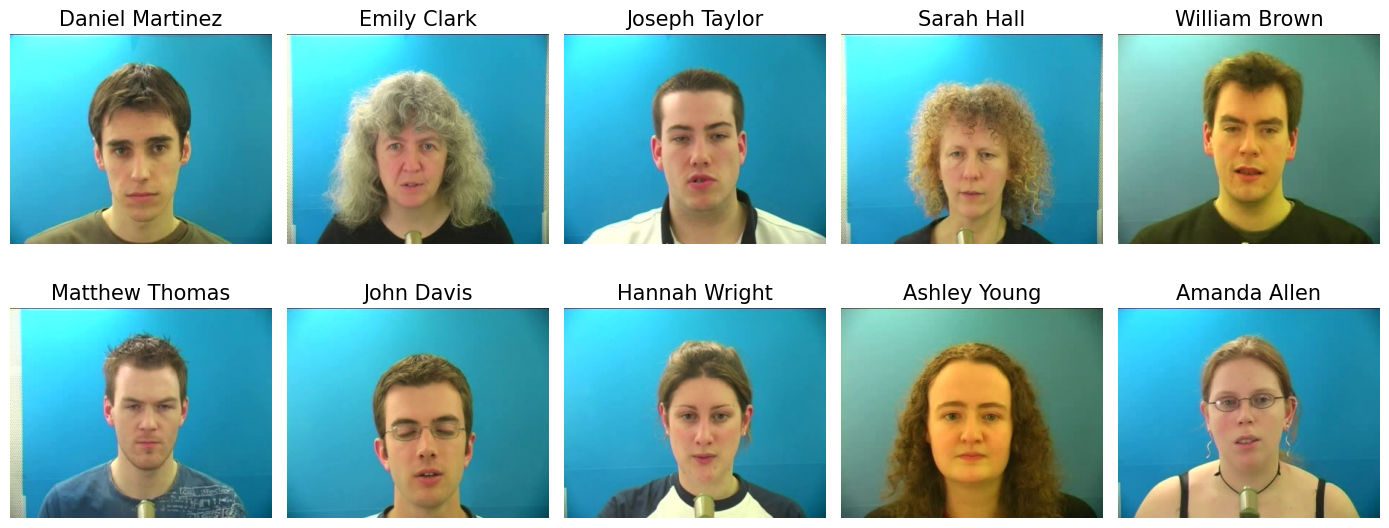

In [9]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your extracted full-frame folder
FULL_FRAMES_PATH = "C:/Users/afsal/Desktop/mfvrs2/full_frame"

# Get list of all actor folders (directories only)
all_folders = [folder for folder in os.listdir(FULL_FRAMES_PATH)
               if os.path.isdir(os.path.join(FULL_FRAMES_PATH, folder))]

# Randomly select 10 folders
selected_folders = random.sample(all_folders, 10)

# Setup 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(14, 6))

# Loop through selected folders
for i, folder in enumerate(selected_folders):
    folder_path = os.path.join(FULL_FRAMES_PATH, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]

    if not image_files:
        continue  # Skip if no images found

    # Pick a random image
    selected_image = random.choice(image_files)
    image_path = os.path.join(folder_path, selected_image)

    # Load and show the image
    img = mpimg.imread(image_path)
    axes[i // 5, i % 5].imshow(img)
    axes[i // 5, i % 5].axis('off')

    # Label with folder name
    axes[i // 5, i % 5].set_title(folder, fontsize=15)

# Adjust layout and show
plt.tight_layout()
plt.show()


In [ ]:
from facenet_pytorch import MTCNN
from PIL import Image
import os

def detect_faces_from_frames(border_percentage=0.5):  # 50% border expansion by default
    mtcnn = MTCNN(keep_all=True)

    for actor_folder in os.listdir(FULL_FRAMES_PATH):
        actor_path = os.path.join(FULL_FRAMES_PATH, actor_folder)
        if os.path.isdir(actor_path):
            save_actor_face_path = os.path.join(FACE_EXTRACTED_PATH, actor_folder)
            os.makedirs(save_actor_face_path, exist_ok=True)

            for img_file in os.listdir(actor_path):
                img_path = os.path.join(actor_path, img_file)
                img = Image.open(img_path).convert('RGB')
                boxes, _ = mtcnn.detect(img)

                if boxes is not None:
                    for i, (x1, y1, x2, y2) in enumerate(boxes):
                        # Calculate border expansion
                        width = x2 - x1
                        height = y2 - y1
                        
                        # Expand the bounding box
                        x1 = max(0, x1 - width * border_percentage / 2)
                        y1 = max(0, y1 - height * border_percentage / 2)
                        x2 = min(img.width, x2 + width * border_percentage / 2)
                        y2 = min(img.height, y2 + height * border_percentage / 2)
                        
                        face = img.crop((x1, y1, x2, y2))
                        face_path = os.path.join(save_actor_face_path, f"{img_file}_face_{i}.jpg")
                        face.save(face_path)

    print("✅ Face extraction from frames complete.")

# Run it with 50% border expansion (adjust percentage as needed)
detect_faces_from_frames(border_percentage=0.5)

✅ Face extraction from frames complete.


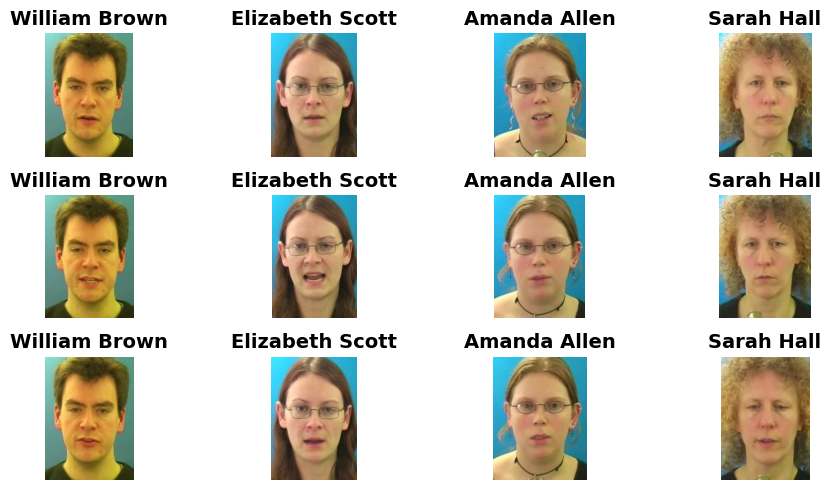

In [33]:
def display_random_faces():
    actor_folders = random.sample(os.listdir(FACE_EXTRACTED_PATH), 4)  # Select 4 random actors
    fig, axes = plt.subplots(3, 4, figsize=(10, 5))  # 3 rows, 4 columns

    for i, actor in enumerate(actor_folders):
        actor_path = os.path.join(FACE_EXTRACTED_PATH, actor)
        image_files = random.sample(os.listdir(actor_path), min(3, len(os.listdir(actor_path))))  # Pick 3 random images
        
        for j, image_file in enumerate(image_files):
            img = cv2.imread(os.path.join(actor_path, image_file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            row, col = j, i  # Arrange images in 3 rows for each actor
            axes[row, col].imshow(img)
            axes[row, col].set_title(actor, fontsize=14, fontweight='bold')  # Increased font size
            axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()

display_random_faces()


In [39]:
import shutil

# Function to split dataset into train and test without deleting original images
def split_dataset():
    for actor_folder in os.listdir(FACE_EXTRACTED_PATH):
        actor_path = os.path.join(FACE_EXTRACTED_PATH, actor_folder)
        if os.path.isdir(actor_path):
            images = os.listdir(actor_path)
            random.shuffle(images)
            train_count = int(0.85 * len(images))
            train_images, test_images = images[:train_count], images[train_count:]
            
            train_path = os.path.join(FACE_TRAIN_PATH, actor_folder)
            test_path = os.path.join(FACE_TEST_PATH, actor_folder)
            os.makedirs(train_path, exist_ok=True)
            os.makedirs(test_path, exist_ok=True)
            
            for img in train_images:
                shutil.copy2(os.path.join(actor_path, img), os.path.join(train_path, img))
            for img in test_images:
                shutil.copy2(os.path.join(actor_path, img), os.path.join(test_path, img))
    
    print("Data splitting completed. Original images remain unchanged.")

split_dataset()


Data splitting completed. Original images remain unchanged.


In [14]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp39-cp39-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp39-cp39-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp39-cp39-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.71.0-cp39-cp39-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl.metadata (14 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


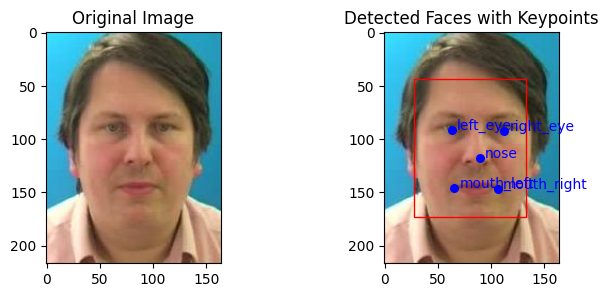

Face 1: (Andrew Moore/swwo8a_0.jpg_face_0.jpg)
   Confidence: 1.00
   Bounding Box: [27, 43, 106, 130]
   Keypoints: {'left_eye': (63, 91), 'right_eye': (112, 92), 'nose': (89, 118), 'mouth_left': (65, 146), 'mouth_right': (106, 147)}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


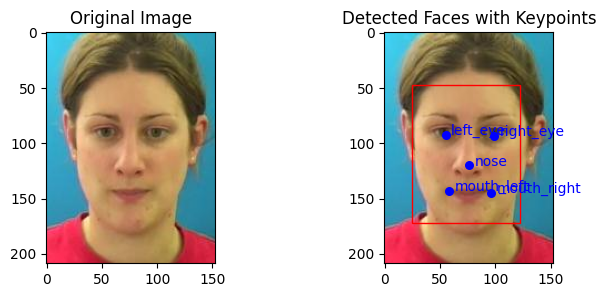

Face 2: (Hannah Wright/brby8s_50.jpg_face_0.jpg)
   Confidence: 1.00
   Bounding Box: [25, 47, 97, 125]
   Keypoints: {'left_eye': (55, 92), 'right_eye': (99, 93), 'nose': (76, 120), 'mouth_left': (58, 143), 'mouth_right': (96, 145)}



In [40]:
import os
import cv2
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# === Your paths ===
BASE_PATH = "C:/Users/afsal/Desktop/mfvrs2"
FACE_TRAIN_PATH = os.path.join(BASE_PATH, "train/facetraindata")

# Get a list of all folders in the train directory
all_folders = [folder for folder in os.listdir(FACE_TRAIN_PATH) if os.path.isdir(os.path.join(FACE_TRAIN_PATH, folder))]

# Randomly select two folders
selected_folders = random.sample(all_folders, 2)

# Initialize MTCNN detector
detector = MTCNN()

# Global face counter
face_counter = 1

# Iterate through selected folders
for folder in selected_folders:
    folder_path = os.path.join(FACE_TRAIN_PATH, folder)

    # Get a list of all images in the folder
    all_images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Skip if no images found
    if not all_images:
        continue

    # Randomly select one image
    selected_image = random.choice(all_images)
    image_path = os.path.join(folder_path, selected_image)

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to read image: {image_path}")
        continue

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    faces = detector.detect_faces(image)

    # Display image with bounding boxes around detected faces
    plt.figure(figsize=(8, 3))

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')

    # Display image with bounding boxes
    plt.subplot(1, 2, 2)
    plt.imshow(image_rgb)

    for face in faces:
        x, y, width, height = face['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        plt.gca().add_patch(rect)

        # Display additional keypoints
        for key, value in face['keypoints'].items():
            plt.scatter(value[0], value[1], s=30, color='blue', marker='o')
            plt.text(value[0] + 5, value[1], key, color='blue')

    plt.title('Detected Faces with Keypoints')
    plt.show()

    # Display metadata of detected faces with global numbering
    for i, face in enumerate(faces):
        print(f"Face {face_counter}: ({folder}/{selected_image})")
        print(f"   Confidence: {face['confidence']:.2f}")
        print(f"   Bounding Box: {face['box']}")
        print(f"   Keypoints: {face['keypoints']}\n")
        face_counter += 1


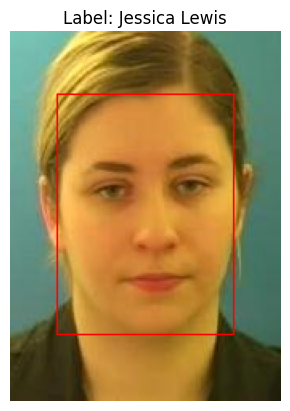

🔍 Embeddings for Face 1:
 [ 4.97375019e-02 -1.89927034e-02  2.06861496e-02  2.87699774e-02
  6.10215142e-02 -5.17305285e-02 -3.05484533e-02  9.21702571e-03
 -3.65981907e-02 -3.23962048e-02 -8.18228573e-02  1.71074569e-02
 -8.95200744e-02 -6.07923884e-03  7.92048723e-02 -6.37583733e-02
 -2.11559745e-04 -6.07185252e-03  2.69515309e-02  7.79310009e-03
  2.21961327e-02  4.98994850e-02 -2.27362290e-02  1.71618094e-03
  1.43638663e-02  1.45966150e-02  1.22819424e-01 -1.28520392e-02
  3.80551666e-02 -8.53408650e-02 -1.00795953e-02  1.24990689e-02
  4.10037935e-02  2.38485951e-02  5.14650010e-02  3.26426863e-03
 -8.62127170e-02  4.75783013e-02 -4.67620231e-02  4.32818606e-02
 -1.90615039e-02  1.58968475e-02  1.34329535e-02 -1.14673108e-01
 -3.82059477e-02 -5.69967031e-02  2.73676012e-02  6.76588155e-03
 -9.20043364e-02  3.77359353e-02  8.42071176e-02  9.61838067e-02
  8.18223581e-02  3.28903906e-02 -2.04817615e-02 -4.74018753e-02
  3.71670648e-02  8.98304507e-02 -2.25623585e-02  2.08425540e-02

In [1]:
import os
import cv2
import random
import matplotlib.pyplot as plt
from PIL import Image
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face

# Your face train path
FACE_TRAIN_PATH = "C:/Users/afsal/Desktop/mfvrs2/train/facetraindata"

# Function to process image, detect face, and calculate embeddings
def process_image(image_path, face_detector, face_embedder, label):
    # Read image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    boxes, probs = face_detector.detect(image_rgb)

    if boxes is not None:
        # Show original image with label
        plt.title(f"Label: {label}")
        plt.imshow(Image.fromarray(image_rgb))

        # Draw rectangles around detected faces
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = [int(b) for b in box]
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 1)

        # Show image with rectangles
        plt.imshow(Image.fromarray(image_rgb))
        plt.axis('off')
        plt.show()

        # Get face embeddings
        transformed_faces = [face_embedder(extract_face(Image.fromarray(image_rgb), box).unsqueeze(0)) for box in boxes]

        # Convert to NumPy and print embeddings
        for i, embedding in enumerate(transformed_faces):
            embedding_np = embedding.squeeze().detach().numpy()
            print(f"🔍 Embeddings for Face {i + 1}:\n", embedding_np)

    else:
        print("❌ No face detected in image:", image_path)

# === Prepare and Run ===

# Get random folder and file from train directory
selected_folder = random.choice(os.listdir(FACE_TRAIN_PATH))
selected_folder_path = os.path.join(FACE_TRAIN_PATH, selected_folder)

# Randomly pick an image from the folder
file = random.choice(os.listdir(selected_folder_path))
file_path = os.path.join(selected_folder_path, file)

# Initialize detectors
face_detector = MTCNN(margin=20, post_process=False, select_largest=False)
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Run the face detection + embedding pipeline
process_image(file_path, face_detector, face_embedder, label=selected_folder)


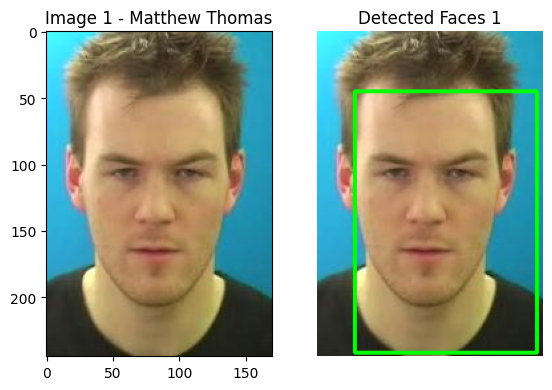

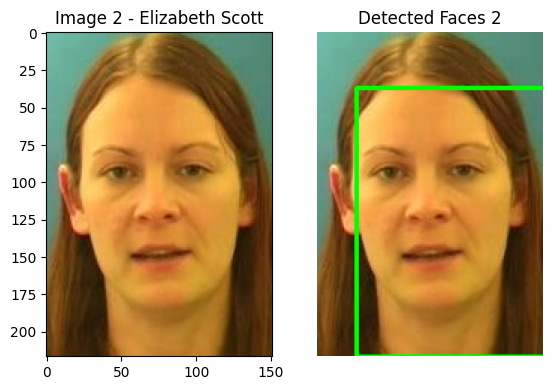

Distance between embeddings: 0.2160
Actual: Different persons


In [2]:
import os
import cv2
import random
import matplotlib.pyplot as plt
from PIL import Image
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
from sklearn.metrics.pairwise import euclidean_distances

# === Your custom paths ===
BASE_PATH = "C:/Users/afsal/Desktop/mfvrs2"
FACE_TRAIN_PATH = os.path.join(BASE_PATH, "train/facetraindata")

# === Function to process two images and compare their face embeddings ===
def process_images(folder_path1, file1, folder_path2, file2, face_detector, face_embedder):
    # Full paths to images
    image1_path = os.path.join(folder_path1, file1)
    image2_path = os.path.join(folder_path2, file2)

    # Read and convert to RGB
    image1 = cv2.imread(image1_path)
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

    image2 = cv2.imread(image2_path)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Detect faces
    faces1, _ = face_detector.detect(image1_rgb)
    faces2, _ = face_detector.detect(image2_rgb)

    label1 = os.path.basename(folder_path1)
    label2 = os.path.basename(folder_path2)

    # Plot image 1
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(image1_rgb))
    plt.title(f"Image 1 - {label1}")
    if faces1 is not None:
        for (x, y, w, h) in faces1:
            cv2.rectangle(image1_rgb, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(image1_rgb))
    plt.title("Detected Faces 1")
    plt.axis('off')
    plt.show()

    # Plot image 2
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(image2_rgb))
    plt.title(f"Image 2 - {label2}")
    if faces2 is not None:
        for (x, y, w, h) in faces2:
            cv2.rectangle(image2_rgb, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(image2_rgb))
    plt.title("Detected Faces 2")
    plt.axis('off')
    plt.show()

    if faces1 is None or faces2 is None:
        print("Face not detected in one or both images.")
        return

    # Get embeddings
    embeddings1 = [face_embedder(extract_face(Image.fromarray(image1_rgb), box).unsqueeze(0)).squeeze().detach().numpy() for box in faces1]
    embeddings2 = [face_embedder(extract_face(Image.fromarray(image2_rgb), box).unsqueeze(0)).squeeze().detach().numpy() for box in faces2]

    # Compare first face from both images
    distance = euclidean_distances([embeddings1[0]], [embeddings2[0]])[0][0]
    print(f"Distance between embeddings: {distance:.4f}")

    if label1 == label2:
        print("Actual: Same person")
    else:
        print("Actual: Different persons")

# === Pick random people and images from local dataset ===
train_directory = FACE_TRAIN_PATH

selected_folders = random.sample(os.listdir(train_directory), 2)
file1 = random.choice(os.listdir(os.path.join(train_directory, selected_folders[0])))
file2 = random.choice(os.listdir(os.path.join(train_directory, selected_folders[1])))

# === Initialize models ===
face_detector = MTCNN(keep_all=True)
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# === Run face comparison ===
process_images(
    os.path.join(train_directory, selected_folders[0]), file1,
    os.path.join(train_directory, selected_folders[1]), file2,
    face_detector, face_embedder
)


In [4]:
import torch
from facenet_pytorch import InceptionResnetV1

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
face_embedder = InceptionResnetV1(pretrained='vggface2').to(device).eval()

# Model summary
from torchsummary import summary
summary(face_embedder, input_size=(3, 160, 160), device='cuda')


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 79, 79]             864
       BatchNorm2d-2           [-1, 32, 79, 79]              64
              ReLU-3           [-1, 32, 79, 79]               0
       BasicConv2d-4           [-1, 32, 79, 79]               0
            Conv2d-5           [-1, 32, 77, 77]           9,216
       BatchNorm2d-6           [-1, 32, 77, 77]              64
              ReLU-7           [-1, 32, 77, 77]               0
       BasicConv2d-8           [-1, 32, 77, 77]               0
            Conv2d-9           [-1, 64, 77, 77]          18,432
      BatchNorm2d-10           [-1, 64, 77, 77]             128
             ReLU-11           [-1, 64, 77, 77]               0
      BasicConv2d-12           [-1, 64, 77, 77]               0
        MaxPool2d-13           [-1, 64, 38, 38]               0
           Conv2d-14           [-1, 80,

In [5]:
import os
import cv2
import numpy as np

# === Local path settings ===
BASE_PATH = "C:/Users/afsal/Desktop/mfvrs2"
FACE_TRAIN_PATH = os.path.join(BASE_PATH, "train/facetraindata")
TRAIN_DETECTED_FACE_PATH = os.path.join(BASE_PATH, "train/detected_faces")

def detect_faces_and_save(image_paths, output_directory):
    processed_images = []
    images_without_faces = 0

    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path)
        if img is None:
            print(f"Could not read image: {image_path}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Haarcascade classifier
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        if len(faces) > 0:
            # Use only the first detected face
            x, y, w, h = faces[0]
            face_roi = img[y:y+h, x:x+w]
            resized_face = cv2.resize(face_roi, (224, 224))

            folder_name = os.path.basename(os.path.dirname(image_path))
            output_folder = os.path.join(output_directory, folder_name)
            os.makedirs(output_folder, exist_ok=True)

            output_path = os.path.join(output_folder, f"detected_face_{i}.jpg")
            cv2.imwrite(output_path, resized_face)

            processed_images.append(resized_face)
        else:
            images_without_faces += 1

        if i % 50 == 0:
            print(f"{i}/{len(image_paths)} images processed", end='\r', flush=True)

    print(f"\nImages without faces detected/Total images: {images_without_faces}/{len(image_paths)}")
    return np.array(processed_images)

# === Create output directory if not present ===
os.makedirs(TRAIN_DETECTED_FACE_PATH, exist_ok=True)

# === Gather all image paths ===
all_image_paths = []
for folder_name in os.listdir(FACE_TRAIN_PATH):
    folder_path = os.path.join(FACE_TRAIN_PATH, folder_name)
    if os.path.isdir(folder_path):
        image_paths = [
            os.path.join(folder_path, img) for img in os.listdir(folder_path)
            if img.lower().endswith(('.jpg', '.jpeg', '.png'))
        ]
        all_image_paths.extend(image_paths)

# === Run detection ===
X_all_processed = detect_faces_and_save(all_image_paths, TRAIN_DETECTED_FACE_PATH)

print("Face detection complete.")


16900/16913 images processed
Images without faces detected/Total images: 83/16913
Face detection complete.


In [13]:
import os

# === Local path to detected faces ===
BASE_PATH = "C:/Users/afsal/Desktop/mfvrs2"
TRAIN_DETECTED_FACE_PATH = os.path.join(BASE_PATH, "train/detected_faces")

# Get all folder names inside the detected faces directory
all_folders = [folder for folder in os.listdir(TRAIN_DETECTED_FACE_PATH) 
               if os.path.isdir(os.path.join(TRAIN_DETECTED_FACE_PATH, folder))]

# Loop through each folder and count files
for folder in all_folders:
    folder_path = os.path.join(TRAIN_DETECTED_FACE_PATH, folder)
    file_count = len(os.listdir(folder_path))
    print(f"Folder: {folder}, File Count: {file_count}")


Folder: Amanda Allen, File Count: 850
Folder: Andrew Moore, File Count: 803
Folder: Ashley Young, File Count: 850
Folder: Christopher Harris, File Count: 848
Folder: Daniel Martinez, File Count: 822
Folder: David Wilson, File Count: 846
Folder: Elizabeth Scott, File Count: 850
Folder: Emily Clark, File Count: 850
Folder: Hannah Wright, File Count: 849
Folder: James Anderson, File Count: 812
Folder: Jennifer King, File Count: 850
Folder: Jessica Lewis, File Count: 846
Folder: John Davis, File Count: 846
Folder: Joseph Taylor, File Count: 850
Folder: Lauren Adams, File Count: 850
Folder: Matthew Thomas, File Count: 850
Folder: Megan Baker, File Count: 837
Folder: Michael Johnson, File Count: 844
Folder: Sarah Hall, File Count: 834
Folder: William Brown, File Count: 843


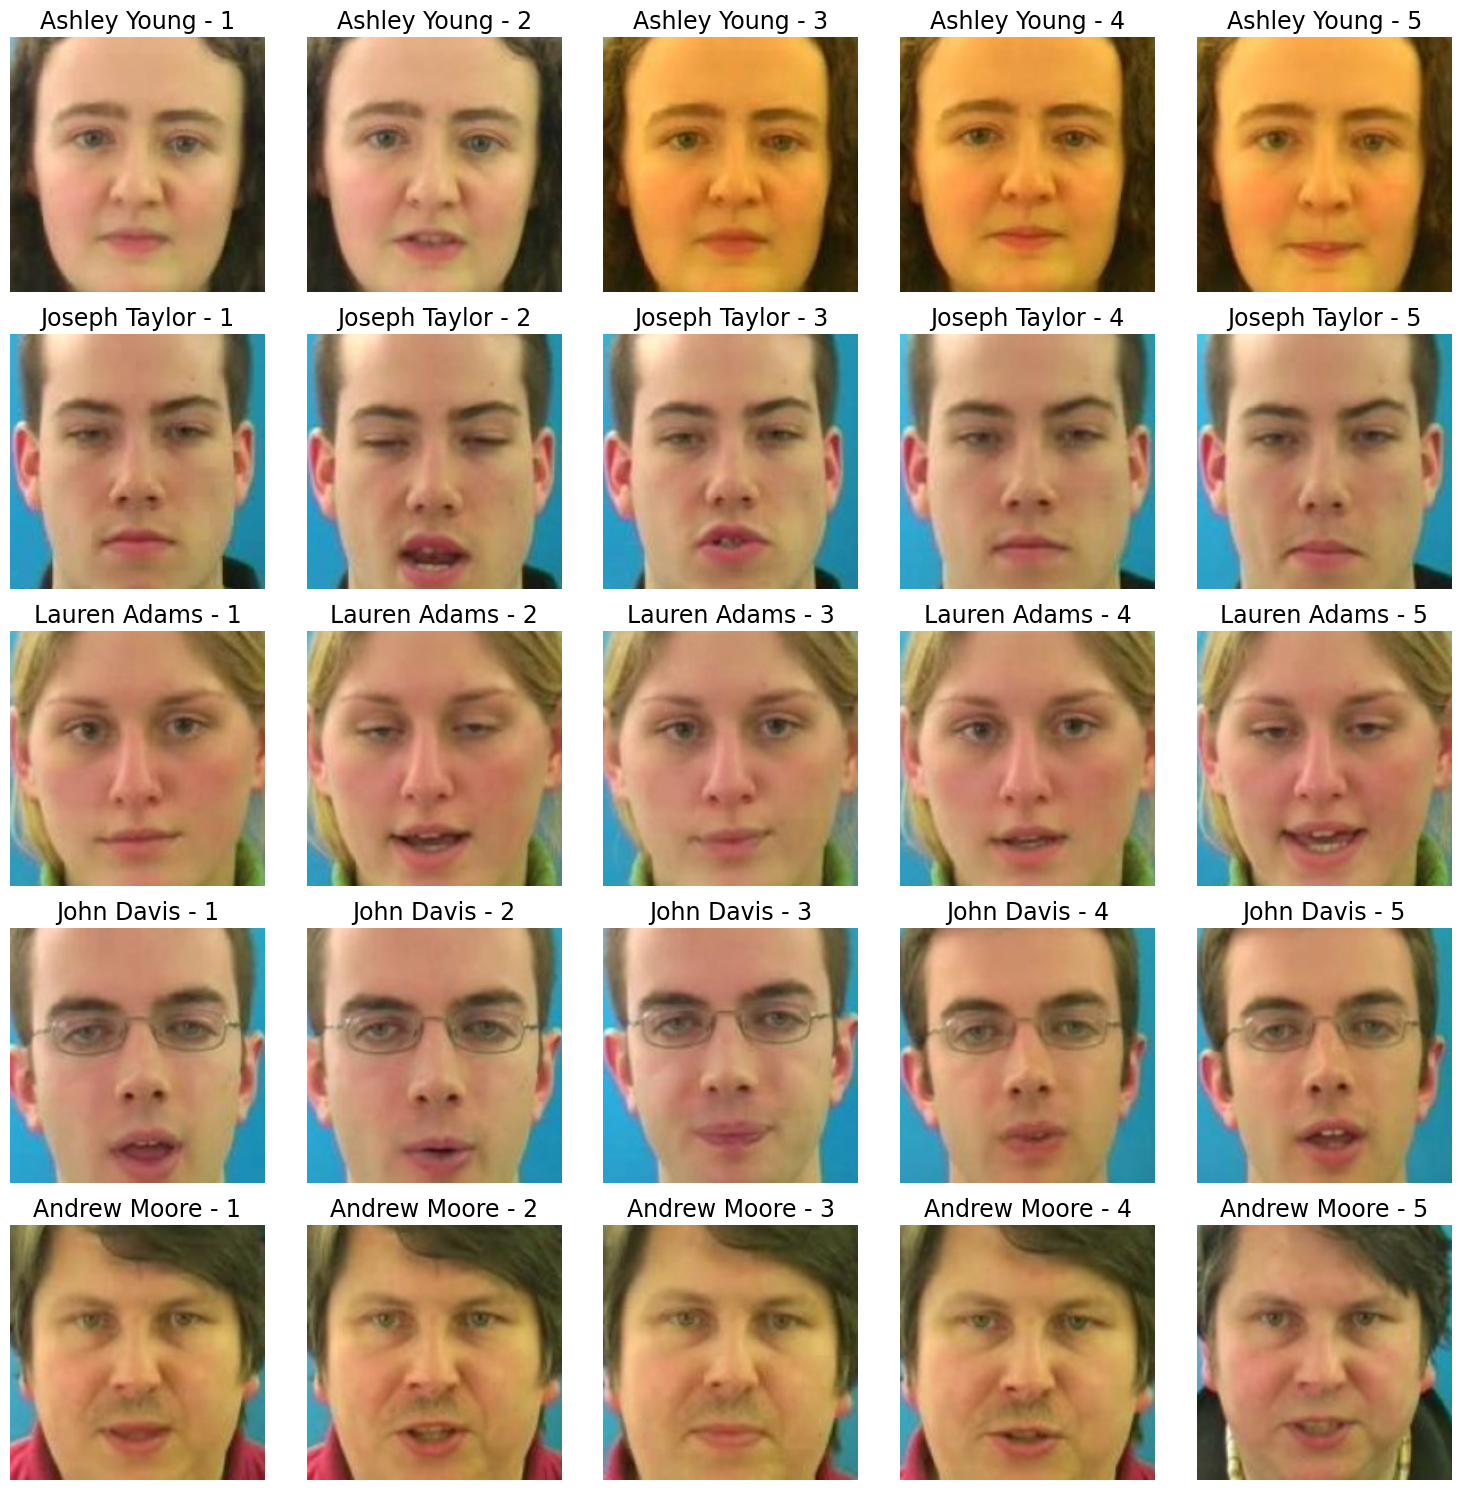

In [12]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# === Local path to detected face images ===
BASE_PATH = "C:/Users/afsal/Desktop/mfvrs2"
TRAIN_DETECTED_FACE_PATH = os.path.join(BASE_PATH, "train/detected_faces")

# Get a list of actor folders in the detected_faces directory
folders = [f for f in os.listdir(TRAIN_DETECTED_FACE_PATH) if os.path.isdir(os.path.join(TRAIN_DETECTED_FACE_PATH, f))]

# Randomly pick five folders
selected_folders = np.random.choice(folders, size=5, replace=False)

# Set up a 5x5 grid for displaying images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

for i, folder_name in enumerate(selected_folders):
    folder_path = os.path.join(TRAIN_DETECTED_FACE_PATH, folder_name)

    # Pick the first 5 images in this folder
    image_paths = [os.path.join(folder_path, img_name) 
                   for img_name in os.listdir(folder_path)[:5]]

    for j, image_path in enumerate(image_paths):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i, j].imshow(img)
        axes[i, j].set_title(f'{folder_name} - {j+1}', fontsize=17)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


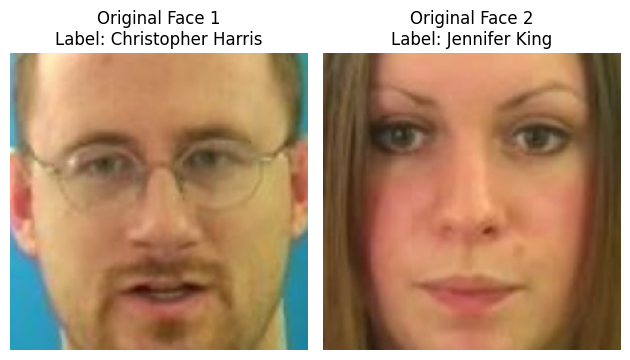

Distance between embeddings: 1.5345


In [14]:
import os
import cv2
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances
from facenet_pytorch import InceptionResnetV1

# === Local Paths ===
BASE_PATH = "C:/Users/afsal/Desktop/mfvrs2"
TRAIN_DETECTED_FACE_PATH = os.path.join(BASE_PATH, "train/detected_faces")

# Function to process and compare two face images
def process_images(face1_path, face2_path, face_embedder):
    # Read the face images
    face1 = cv2.imread(face1_path)
    face1_rgb = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

    face2 = cv2.imread(face2_path)
    face2_rgb = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

    # Labels from folder names
    label1 = os.path.basename(os.path.dirname(face1_path))
    label2 = os.path.basename(os.path.dirname(face2_path))

    # Display the face images
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(face1_rgb))
    plt.title(f"Original Face 1\nLabel: {label1}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(face2_rgb))
    plt.title(f"Original Face 2\nLabel: {label2}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Convert images to tensors
    face1_tensor = torch.from_numpy(face1_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0
    face2_tensor = torch.from_numpy(face2_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0

    # Get embeddings
    embeddings1 = face_embedder(face1_tensor).detach().numpy()
    embeddings2 = face_embedder(face2_tensor).detach().numpy()

    # Calculate Euclidean distance
    distance = euclidean_distances(embeddings1.reshape(1, -1), embeddings2.reshape(1, -1))[0][0]

    print(f"Distance between embeddings: {distance:.4f}")

# === Randomly select two face images from different folders ===
selected_folders = random.sample(os.listdir(TRAIN_DETECTED_FACE_PATH), 2)

file1 = random.choice(os.listdir(os.path.join(TRAIN_DETECTED_FACE_PATH, selected_folders[0])))
file2 = random.choice(os.listdir(os.path.join(TRAIN_DETECTED_FACE_PATH, selected_folders[1])))

face1_path = os.path.join(TRAIN_DETECTED_FACE_PATH, selected_folders[0], file1)
face2_path = os.path.join(TRAIN_DETECTED_FACE_PATH, selected_folders[1], file2)

# Initialize the pretrained face embedder
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Run comparison
process_images(face1_path, face2_path, face_embedder)


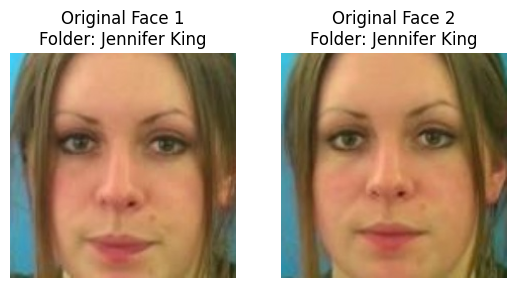

Distance between embeddings: 0.4333


In [16]:
import os
import random
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import torch

# Function to process images and calculate embeddings
def process_images(folder_path, face1_file, face2_file, face_embedder):
    # Read the pre-detected face images
    face1_path = os.path.join(folder_path, face1_file)
    face2_path = os.path.join(folder_path, face2_file)

    face1 = cv2.imread(face1_path)
    face1_rgb = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

    face2 = cv2.imread(face2_path)
    face2_rgb = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

    # Display original face images
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(face1_rgb))
    plt.title(f"Original Face 1\nFolder: {os.path.basename(folder_path)}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(face2_rgb))
    plt.title(f"Original Face 2\nFolder: {os.path.basename(folder_path)}")
    plt.axis('off')

    plt.show()

    # Convert NumPy arrays to PyTorch tensors
    face1_tensor = torch.from_numpy(face1_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0
    face2_tensor = torch.from_numpy(face2_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0

    # Calculate embeddings for the faces
    embeddings1 = face_embedder(face1_tensor).detach().numpy()
    embeddings2 = face_embedder(face2_tensor).detach().numpy()

    # Calculate distance between embeddings
    distance = euclidean_distances(embeddings1.reshape(1, -1), embeddings2.reshape(1, -1))[0][0]
    print(f"Distance between embeddings: {distance:.4f}")

# ✅ Your updated local directory path
train_detected_faces_directory = 'C:/Users/afsal/Desktop/mfvrs2/train/detected_faces'

# Randomly pick one folder
selected_folder = random.choice(os.listdir(train_detected_faces_directory))
folder_path = os.path.join(train_detected_faces_directory, selected_folder)

# Randomly pick two different files from the selected folder
files = random.sample(os.listdir(folder_path), 2)
face1_file, face2_file = files

# Load the face embedder model
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Run the embedding comparison
process_images(folder_path, face1_file, face2_file, face_embedder)


In [17]:
!pip install tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [19]:
import os
import torch
import numpy as np
from facenet_pytorch import InceptionResnetV1
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

# Function to extract embeddings from a single folder with data augmentation
def extract_embeddings_from_folder(folder_path, face_embedder, device, output_directory):
    embeddings = {}
    data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.RandomRotation(10),
        transforms.ToTensor()
    ])

    label = os.path.basename(folder_path)

    for image_name in tqdm(os.listdir(folder_path), desc=f"Processing {folder_path}"):
        image_path = os.path.join(folder_path, image_name)
        try:
            img = Image.open(image_path).convert('RGB')

            # Original image embedding
            img_tensor = transforms.ToTensor()(img).unsqueeze(0).float().to(device)
            embedding = face_embedder(img_tensor).squeeze().detach().cpu().numpy()
            embeddings[image_name] = embedding

            # Save original embedding
            output_emb_path = os.path.join(output_directory, f"{label}_{os.path.splitext(image_name)[0]}_embedding.npy")
            np.save(output_emb_path, embedding)

            # Augmented image embedding
            augmented_img = data_transform(img)
            img_tensor_augmented = augmented_img.unsqueeze(0).float().to(device)
            embedding_aug = face_embedder(img_tensor_augmented).squeeze().detach().cpu().numpy()
            embeddings[f"{os.path.splitext(image_name)[0]}_augmented"] = embedding_aug

            output_emb_path_aug = os.path.join(output_directory, f"{label}_{os.path.splitext(image_name)[0]}_augmented_embedding.npy")
            np.save(output_emb_path_aug, embedding_aug)

        except Exception as e:
            print(f"Error processing {image_name}: {str(e)}")

    return label, embeddings

# ✅ Local directory paths
input_directory = 'C:/Users/afsal/Desktop/mfvrs2/train/detected_faces'
output_directory = 'C:/Users/afsal/Desktop/mfvrs2/extracted_embeddings'

# Set device and initialize the face embedding model
device = 'cpu'  # You can change this to 'cuda' if using GPU
face_embedder = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Loop through each actor's folder and extract embeddings
for folder_name in os.listdir(input_directory):
    folder_path = os.path.join(input_directory, folder_name)

    # Output subdirectory for each label
    label_output_directory = os.path.join(output_directory, folder_name)
    os.makedirs(label_output_directory, exist_ok=True)

    extract_embeddings_from_folder(folder_path, face_embedder, device, label_output_directory)

print("✅ Embeddings extraction complete.")


Processing C:/Users/afsal/Desktop/mfvrs2/train/detected_faces\Amanda Allen: 100%|██████████| 850/850 [06:24<00:00,  2.21it/s]
Processing C:/Users/afsal/Desktop/mfvrs2/train/detected_faces\Andrew Moore: 100%|██████████| 803/803 [06:53<00:00,  1.94it/s]
Processing C:/Users/afsal/Desktop/mfvrs2/train/detected_faces\Ashley Young: 100%|██████████| 850/850 [07:02<00:00,  2.01it/s]
Processing C:/Users/afsal/Desktop/mfvrs2/train/detected_faces\Christopher Harris: 100%|██████████| 848/848 [06:59<00:00,  2.02it/s]
Processing C:/Users/afsal/Desktop/mfvrs2/train/detected_faces\Daniel Martinez: 100%|██████████| 822/822 [06:52<00:00,  1.99it/s]
Processing C:/Users/afsal/Desktop/mfvrs2/train/detected_faces\David Wilson: 100%|██████████| 846/846 [07:32<00:00,  1.87it/s]
Processing C:/Users/afsal/Desktop/mfvrs2/train/detected_faces\Elizabeth Scott: 100%|██████████| 850/850 [07:57<00:00,  1.78it/s]
Processing C:/Users/afsal/Desktop/mfvrs2/train/detected_faces\Emily Clark: 100%|██████████| 850/850 [07:21

✅ Embeddings extraction complete.


In [20]:
import os
import shutil

source_folder = "C:/Users/afsal/Desktop/mfvrs2/extracted_embeddings"
destination_folder = "C:/Users/afsal/Desktop/mfvrs2/extracted_embeddings_test"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate through each folder in the source directory
for folder_name in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Create the corresponding folder in the destination directory
        destination_folder_path = os.path.join(destination_folder, folder_name)
        os.makedirs(destination_folder_path, exist_ok=True)

        # Get the list of non-augmented files
        files = [f for f in os.listdir(folder_path) if "augmented" not in f and f.endswith(".npy")]

        # Copy the first two non-augmented files
        for file_name in files[:2]:
            source_file_path = os.path.join(folder_path, file_name)
            destination_file_path = os.path.join(destination_folder_path, file_name)
            shutil.copy(source_file_path, destination_file_path)

print("✅ Files copied successfully.")


✅ Files copied successfully.


In [21]:
import os
import numpy as np
from sklearn.metrics import pairwise_distances

# Function to calculate average embedding for each label
def calculate_average_embeddings(base_folder):
    average_embeddings = {}

    for label_folder in os.listdir(base_folder):
        label_path = os.path.join(base_folder, label_folder)
        if os.path.isdir(label_path):
            label_embeddings = []
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                embedding = np.load(file_path)
                label_embeddings.append(embedding)

            average_embedding = np.mean(label_embeddings, axis=0)
            average_embeddings[label_folder] = average_embedding

    return average_embeddings

# Function to recognize faces based on existing embeddings
def recognize_faces(test_folder, average_embeddings):
    predictions = []

    for label_folder in os.listdir(test_folder):
        label_path = os.path.join(test_folder, label_folder)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)

                test_embedding = np.load(file_path)

                # Compare with averaged embeddings
                distances = {}
                for label, avg_embedding in average_embeddings.items():
                    distance = np.linalg.norm(test_embedding - avg_embedding)
                    distances[label] = distance

                predicted_label = min(distances, key=distances.get)
                predictions.append((file_name, label_folder, predicted_label))

    return predictions

# === Local Paths ===
base_folder = "C:/Users/afsal/Desktop/mfvrs2/extracted_embeddings"
test_folder = "C:/Users/afsal/Desktop/mfvrs2/extracted_embeddings_test"

# Run recognition
average_embeddings = calculate_average_embeddings(base_folder)
predictions = recognize_faces(test_folder, average_embeddings)

# Show results
for file_name, actual_label, predicted_label in predictions:
    print(f"{file_name}: Actual Label - {actual_label}, Predicted Label - {predicted_label}")


Amanda Allen_detected_face_0_embedding.npy: Actual Label - Amanda Allen, Predicted Label - Amanda Allen
Amanda Allen_detected_face_100_embedding.npy: Actual Label - Amanda Allen, Predicted Label - Amanda Allen
Andrew Moore_detected_face_1000_embedding.npy: Actual Label - Andrew Moore, Predicted Label - Andrew Moore
Andrew Moore_detected_face_1001_embedding.npy: Actual Label - Andrew Moore, Predicted Label - Andrew Moore
Ashley Young_detected_face_1653_embedding.npy: Actual Label - Ashley Young, Predicted Label - Ashley Young
Ashley Young_detected_face_1654_embedding.npy: Actual Label - Ashley Young, Predicted Label - Ashley Young
Christopher Harris_detected_face_2503_embedding.npy: Actual Label - Christopher Harris, Predicted Label - Christopher Harris
Christopher Harris_detected_face_2504_embedding.npy: Actual Label - Christopher Harris, Predicted Label - Christopher Harris
Daniel Martinez_detected_face_3353_embedding.npy: Actual Label - Daniel Martinez, Predicted Label - Daniel Marti

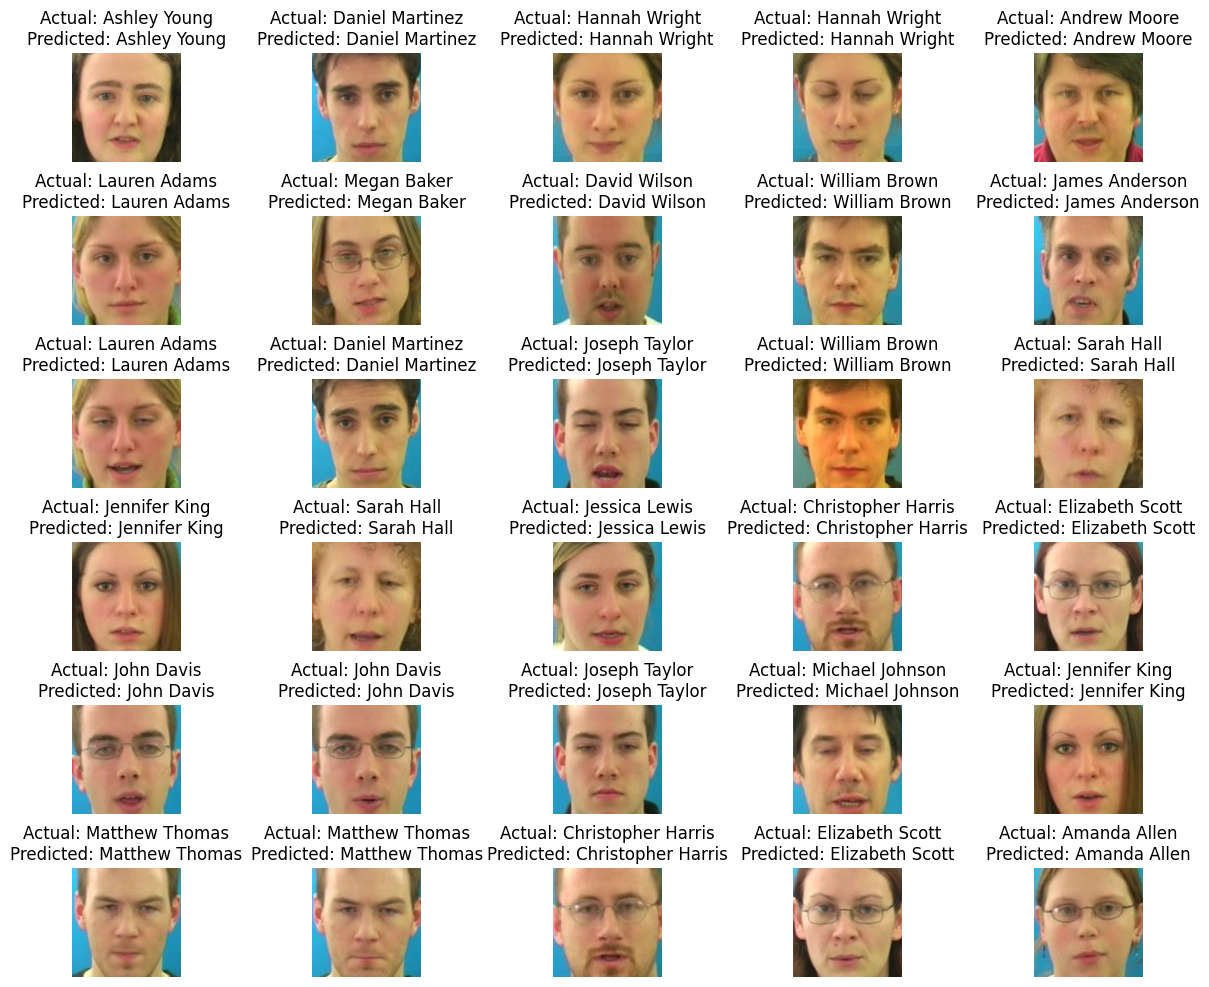

In [22]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import pairwise_distances

# === Function to calculate average embeddings ===
def calculate_average_embeddings(base_folder):
    average_embeddings = {}

    for label_folder in os.listdir(base_folder):
        label_path = os.path.join(base_folder, label_folder)
        if os.path.isdir(label_path):
            label_embeddings = []
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                embedding = np.load(file_path)
                label_embeddings.append(embedding)

            average_embedding = np.mean(label_embeddings, axis=0)
            average_embeddings[label_folder] = average_embedding

    return average_embeddings

# === Function to recognize faces ===
def recognize_faces(test_folder, average_embeddings):
    predictions = []

    for label_folder in os.listdir(test_folder):
        label_path = os.path.join(test_folder, label_folder)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)

                test_embedding = np.load(file_path)

                distances = {}
                for label, avg_embedding in average_embeddings.items():
                    distance = np.linalg.norm(test_embedding - avg_embedding)
                    distances[label] = distance

                predicted_label = min(distances, key=distances.get)
                predictions.append((file_name, label_folder, predicted_label))

    return predictions

# === Function to display a few random images with labels ===
def display_random_images(predictions, image_folder, num_images=40):
    selected_predictions = random.sample(predictions, min(num_images, len(predictions)))

    num_rows = (num_images + 4) // 5
    num_cols = min(5, num_images)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    for i, (file_name, actual_label, predicted_label) in enumerate(selected_predictions):
        identifier_start = file_name.find("_detected_face_") + len("_detected_face_")
        identifier_end = file_name.find("_", identifier_start)
        identifier = file_name[identifier_start:] if identifier_end == -1 else file_name[identifier_start:identifier_end]

        image_name = f"detected_face_{identifier}.jpg"
        image_path = os.path.join(image_folder, actual_label, image_name)

        try:
            image = Image.open(image_path)
            axes[i // 5, i % 5].imshow(image)
            axes[i // 5, i % 5].set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
            axes[i // 5, i % 5].axis('off')
        except FileNotFoundError:
            print(f"Image not found for {identifier}. Skipping to the next one.")

    plt.show()


# === Your Local Paths ===
base_folder = "C:/Users/afsal/Desktop/mfvrs2/extracted_embeddings"
test_folder = "C:/Users/afsal/Desktop/mfvrs2/extracted_embeddings_test"
image_folder = "C:/Users/afsal/Desktop/mfvrs2/train/detected_faces"

# === Run Recognition & Display ===
average_embeddings = calculate_average_embeddings(base_folder)
predictions = recognize_faces(test_folder, average_embeddings)
display_random_images(predictions, image_folder, num_images=30)


In [23]:
import os
import numpy as np
import random

# === Function to calculate average embeddings ===
def calculate_average_embeddings(base_folder):
    average_embeddings = {}

    for label_folder in os.listdir(base_folder):
        label_path = os.path.join(base_folder, label_folder)
        if os.path.isdir(label_path):
            label_embeddings = []
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                embedding = np.load(file_path)
                label_embeddings.append(embedding)

            average_embedding = np.mean(label_embeddings, axis=0)
            average_embeddings[label_folder] = average_embedding

    return average_embeddings

# === Function to load all test embeddings ===
def load_test_embeddings(test_folder):
    test_embeddings = []

    for label_folder in os.listdir(test_folder):
        label_path = os.path.join(test_folder, label_folder)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                test_embedding = np.load(file_path)
                test_embeddings.append((file_name, label_folder, test_embedding))

    return test_embeddings


# === Your Local Paths ===
base_folder = "C:/Users/afsal/Desktop/mfvrs2/extracted_embeddings"
test_folder = "C:/Users/afsal/Desktop/mfvrs2/extracted_embeddings_test"

# === Load Embeddings ===
average_embeddings = calculate_average_embeddings(base_folder)
test_embeddings = load_test_embeddings(test_folder)

# === Pick Two Random Test Embeddings ===
random_test_embeddings = random.sample(test_embeddings, 2)

# === Compare Distances ===
for file_name, label, test_embedding in random_test_embeddings:
    print(f"\nDistances for {file_name} (Actual: {label}) against Average Embeddings:")
    for avg_label, avg_embedding in average_embeddings.items():
        distance = np.linalg.norm(test_embedding - avg_embedding)
        print(f"  Distance to {avg_label}: {distance:.4f}")



Distances for Christopher Harris_detected_face_2504_embedding.npy (Actual: Christopher Harris) against Average Embeddings:
  Distance to Amanda Allen: 1.1138
  Distance to Andrew Moore: 1.2607
  Distance to Ashley Young: 1.3586
  Distance to Christopher Harris: 0.3615
  Distance to Daniel Martinez: 1.3927
  Distance to David Wilson: 1.2726
  Distance to Elizabeth Scott: 1.1640
  Distance to Emily Clark: 1.4635
  Distance to Hannah Wright: 1.3248
  Distance to James Anderson: 1.2758
  Distance to Jennifer King: 1.3701
  Distance to Jessica Lewis: 1.4187
  Distance to John Davis: 1.0346
  Distance to Joseph Taylor: 1.3523
  Distance to Lauren Adams: 1.3227
  Distance to Matthew Thomas: 1.2349
  Distance to Megan Baker: 1.3314
  Distance to Michael Johnson: 1.2694
  Distance to Sarah Hall: 1.2806
  Distance to William Brown: 1.3167

Distances for Ashley Young_detected_face_1654_embedding.npy (Actual: Ashley Young) against Average Embeddings:
  Distance to Amanda Allen: 1.3177
  Distance 

C:\Users\afsal\AppData\Local\Temp\ipykernel_10984\540753531.py:33: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  X = torch.tensor(embeddings, dtype=torch.float32)


Epoch 1/20, Train Loss: 0.0008, Val Loss: 0.0016
Epoch 2/20, Train Loss: 0.0001, Val Loss: 0.0007
Epoch 3/20, Train Loss: 0.0001, Val Loss: 0.0005
Epoch 4/20, Train Loss: 0.0000, Val Loss: 0.0007
Epoch 5/20, Train Loss: 0.0016, Val Loss: 0.0005
Epoch 6/20, Train Loss: 0.0000, Val Loss: 0.0003
Epoch 7/20, Train Loss: 0.0000, Val Loss: 0.0001
Epoch 8/20, Train Loss: 0.0000, Val Loss: 0.0001
Epoch 9/20, Train Loss: 0.0000, Val Loss: 0.0001
Epoch 10/20, Train Loss: 0.0000, Val Loss: 0.0001
Epoch 11/20, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 12/20, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 13/20, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 14/20, Train Loss: 0.0001, Val Loss: 0.0017
Epoch 15/20, Train Loss: 0.0000, Val Loss: 0.0001
Epoch 16/20, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 17/20, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 18/20, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 19/20, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 20/20, Train Loss: 0.0000, Val Loss: 0.0000

Classifi

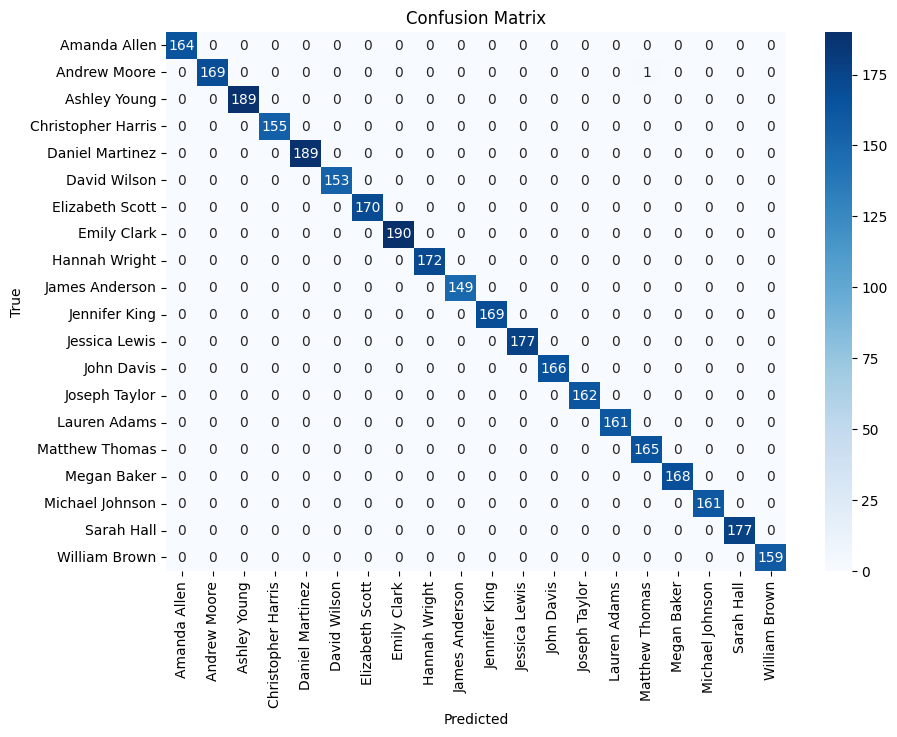

In [24]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Disable CUDA
torch.cuda.is_available = lambda : False
device = torch.device("cpu")

# Load embeddings and labels
data_dir = "C:/Users/afsal/Desktop/mfvrs2/extracted_embeddings"
embeddings = []
labels = []

for label_folder in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label_folder)
    if os.path.isdir(label_path):
        for file_name in os.listdir(label_path):
            file_path = os.path.join(label_path, file_name)
            if file_name.endswith(".npy"):
                embedding = np.load(file_path)
                embeddings.append(embedding)
                labels.append(label_folder)

# Convert data to tensors
X = torch.tensor(embeddings, dtype=torch.float32)
labels = np.array(labels)

# Encode string labels to integers
label_encoder = LabelEncoder()
y = torch.tensor(label_encoder.fit_transform(labels), dtype=torch.long)

# Split data: 80% train, 10% val, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the model
class UpdatedModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(UpdatedModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize model
input_size = X_train.shape[1]
num_classes = len(label_encoder.classes_)
model = UpdatedModel(input_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size].to(device)
        targets = y_train[i:i+batch_size].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val.to(device))
        val_loss = criterion(val_outputs, y_val.to(device))

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# === Evaluate on test data ===
model.eval()
with torch.no_grad():
    test_outputs = model(X_test.to(device))
    test_loss = criterion(test_outputs, y_test.to(device))
    predicted_classes = torch.argmax(test_outputs, dim=1).cpu().numpy()
    true_classes = y_test.cpu().numpy()

    predicted_labels = label_encoder.inverse_transform(predicted_classes)
    true_labels = label_encoder.inverse_transform(true_classes)

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# === Confusion Matrix ===
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [25]:
# Save the trained model
MODEL_SAVE_PATH = "C:/Users/afsal/Desktop/mfvrs/models/facemodel/facenet_classifier.pth"
torch.save(model.state_dict(), MODEL_SAVE_PATH)
print(f"Model saved to {MODEL_SAVE_PATH}")


Model saved to C:/Users/afsal/Desktop/mfvrs/models/facemodel/facenet_classifier.pth
